# Example of using R Markdown with jupyter notebook: An eye movement analysis of sentence reading 


## Abstract 
Mild reading difficulties are a pervasive symptom of aphasia, a language impairment common post stroke. In this study, we used eye tracking to investigate sentence reading by one person diagnosed with aphasia (PWA), compared to a neurologically healthy participant (NHI). Data were extracted from a larger project on sentence reading (published in Aphasiology online). The main aim of this study was to find out whether the eye movements of these two readers are influenced by linguistic factors of word frequency and contextual predictability. The two participants read sentences including target words that varied in word frequency and contextual predictability, and answered comprehension questions. We recorded gaze duration, total fixation duration, and first-pass regressions. Results demonstrated that the PWA had prolonged gaze and total fixation duratations and an increase of first-pass regressions compared to the NHI. Both readers were influenced by word frequency and predictability, but in different ways. Readers varied in gaze duration and first-pass regressions in particular, which may point to differences in the phase of lexical access.

## load libraries

In [56]:
library(gdata) # used
library(psych)
library(compute.es)
library(ggplot2) # used
library(multcomp)
library(pastecs) # used
library(ez)
library(Hmisc)
library(reshape) # used
library(gridExtra) #used

#set working directory
setwd("~/code/juypternotebooks")

## We are going to load data of the two participants from the reading study.

In [57]:
rawdata=read.xls("EMdataexample.xlsx", 
                 na.strings = c("zero"),
                 colClasses = c(
                   'factor',  # RECORDING_SESSION_LABEL
                   'factor',  # GROUP
                   'factor',  # ID_OVERALL
                   'factor',  # ID
                   'factor',  # TRIAL_INDEX
                   'factor',  # trial_type
                   'factor',  # FREQUENCY
                   'factor',  # PREDICTABILITY
                   'factor',  # SENTENCE
                   'factor',  # ITEM
                   'factor',  # QUESTION
                   'factor',  # CRITICAL_WORD
                   'factor',  # ACCURACY   
                   'character', # SINGLE_FIXATION_DURATION
                   'character', # FIRST_FIXATION_DURATION
                   'character', # GAZE_DURATION
                   'character', # RIGHT_BOUNDED_DURATION
                   'character', # REGRESSION_PATH_DURATION
                   'character', # REREADING_DURATION
                   'character', # TOTAL_DURATION
                   'character',  # FIRST_PASS_REGRESSION
                   'character',  # FIRST_PASS_FIXATION
                   'factor',  # FIRST_PASS_MULTI_FIXATION 
                   'character' #trials.fixated
                 )
)


## Create a new dataframe for analysis

In [58]:
data <-rawdata
data

RECORDING_SESSION_LABEL,GROUP,ID_OVERALL,ID,TRIAL_INDEX,TRIAL_TYPE,FREQUENCY,PREDICTABILITY,SENTENCE,ITEM,⋯,GAZE_DURATION,RIGHT_BOUNDED_DURATION,REGRESSION_PATH_DURATION,REREADING_DURATION,TOTAL_DURATION,FIRST_PASS_REGRESSION,FIRST_PAST_FIXATION,FIRST_PASS_MULTI_FIXATION,trials.fixated,BLINK
c_11_a,NHI,1,1,1,Experimental WP LF U,low frequency,unpredictable,After the accident they rushed to the campsite to get the injury cleaned.,campsite,⋯,315,315,315,0,546,0,1,0,1,no
c_11_a,NHI,1,1,2,Experimental WP HF U,high frequency,unpredictable,William needs a custom made suit and goes to the school to get one.,school,⋯,153,153,636,483,153,1,1,0,1,no
c_11_a,NHI,1,1,3,Experimental WP LF P,low frequency,predictable,Captain Scott was an Antarctic explorer who was not afraid of challenges.,explorer,⋯,143,143,143,0,316,0,1,0,1,no
c_11_a,NHI,1,1,4,Experimental WP HF U,high frequency,unpredictable,Carla keeps her jewellery in a bank when she goes on holidays.,bank,⋯,385,385,385,0,385,0,1,0,1,no
c_11_a,NHI,1,1,5,Experimental WP LF U,low frequency,unpredictable,The young couple are saving to buy a hostel to refurbish.,hostel,⋯,512,512,512,0,1136,0,1,1,1,no
c_11_a,NHI,1,1,6,Experimental WP HF U,high frequency,unpredictable,The poor backpackers are staying in a house in New York.,house,⋯,253,422,675,422,422,1,1,1,1,no
c_11_a,NHI,1,1,7,Experimental WP LF P,low frequency,predictable,"Lisa does not like letters, but prefers to write a quick email to tell others about her news.",email,⋯,179,179,179,0,179,0,1,0,1,no
c_11_a,NHI,1,1,8,Experimental WP HF P,high frequency,predictable,Anna was able to get a reduced ticket for the show because she is a student working there.,student,⋯,277,277,277,0,277,0,1,0,1,no
c_11_a,NHI,1,1,9,Experimental WP HF U,high frequency,unpredictable,After a long day the gambler went to play in the office near his home.,office,⋯,NA,0,0,.,NA,.,0,.,0,no
c_11_a,NHI,1,1,10,Experimental WP HF P,high frequency,predictable,The athlete drinks lots of water at the weekend.,water,⋯,157,157,157,0,380,0,1,0,1,no


## Explore data

In [59]:
str(data)
summary(data) 
head(data[, 1:10])
tail(data[, 1:10])
dim(data)

'data.frame':	112 obs. of  25 variables:
 $ RECORDING_SESSION_LABEL  : Factor w/ 4 levels "c_11_a","c_11_b",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GROUP                    : Factor w/ 2 levels "NHI","PWA": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID_OVERALL               : Factor w/ 2 levels "1","21": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID                       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ TRIAL_INDEX              : Factor w/ 28 levels "1","10","11",..: 1 12 22 23 24 25 26 27 28 2 ...
 $ TRIAL_TYPE               : Factor w/ 4 levels "Experimental WP HF P",..: 4 2 3 2 4 2 3 1 2 1 ...
 $ FREQUENCY                : Factor w/ 2 levels "high frequency",..: 2 1 2 1 2 1 2 1 1 1 ...
 $ PREDICTABILITY           : Factor w/ 2 levels "predictable",..: 2 2 1 2 2 2 1 1 2 1 ...
 $ SENTENCE                 : Factor w/ 56 levels "After a long day at work she forgot her keys and had to go back to the casino to get them.",..: 7 55 18 19 47 46 31 12 6 39 ...
 $ ITEM                     : Factor w/ 28 levels "ban

 RECORDING_SESSION_LABEL GROUP    ID_OVERALL ID       TRIAL_INDEX
 c_11_a :28              NHI:56   1 :56      1:112   1      : 4  
 c_11_b :28              PWA:56   21:56              10     : 4  
 pwa_1_a:28                                          11     : 4  
 pwa_1_b:28                                          12     : 4  
                                                     13     : 4  
                                                     14     : 4  
                                                     (Other):88  
                TRIAL_TYPE          FREQUENCY        PREDICTABILITY
 Experimental WP HF P:28   high frequency:56   predictable  :56    
 Experimental WP HF U:28   low frequency :56   unpredictable:56    
 Experimental WP LF P:28                                           
 Experimental WP LF U:28                                           
                                                                   
                                                                

RECORDING_SESSION_LABEL,GROUP,ID_OVERALL,ID,TRIAL_INDEX,TRIAL_TYPE,FREQUENCY,PREDICTABILITY,SENTENCE,ITEM
c_11_a,NHI,1,1,1,Experimental WP LF U,low frequency,unpredictable,After the accident they rushed to the campsite to get the injury cleaned.,campsite
c_11_a,NHI,1,1,2,Experimental WP HF U,high frequency,unpredictable,William needs a custom made suit and goes to the school to get one.,school
c_11_a,NHI,1,1,3,Experimental WP LF P,low frequency,predictable,Captain Scott was an Antarctic explorer who was not afraid of challenges.,explorer
c_11_a,NHI,1,1,4,Experimental WP HF U,high frequency,unpredictable,Carla keeps her jewellery in a bank when she goes on holidays.,bank
c_11_a,NHI,1,1,5,Experimental WP LF U,low frequency,unpredictable,The young couple are saving to buy a hostel to refurbish.,hostel
c_11_a,NHI,1,1,6,Experimental WP HF U,high frequency,unpredictable,The poor backpackers are staying in a house in New York.,house


,RECORDING_SESSION_LABEL,GROUP,ID_OVERALL,ID,TRIAL_INDEX,TRIAL_TYPE,FREQUENCY,PREDICTABILITY,SENTENCE,ITEM
107,pwa_1_b,PWA,21,1,23,Experimental WP LF U,low frequency,unpredictable,Before she goes to bed her mum reads her a short email written by her father.,email
108,pwa_1_b,PWA,21,1,24,Experimental WP LF U,low frequency,unpredictable,Ryan loves old castles and is interested in their geology and tales.,geology
109,pwa_1_b,PWA,21,1,25,Experimental WP HF U,high frequency,unpredictable,"Lisa does not like letters, but prefers to write a quick story to tell others about her news.",story
110,pwa_1_b,PWA,21,1,26,Experimental WP HF U,high frequency,unpredictable,At the distillery in Scotland the man bought a bottle of water to take home.,water
111,pwa_1_b,PWA,21,1,27,Experimental WP LF U,low frequency,unpredictable,Anna was able to get a reduced ticket for the show because she is a florist working there.,florist
112,pwa_1_b,PWA,21,1,28,Experimental WP HF P,high frequency,predictable,The young couple are saving to buy a house to refurbish.,house


[1] 112  25

## Preparing variables we are interested in:
### Create variables as numeric

In [60]:
data$TOTAL_DURATION  <-as.numeric(data$TOTAL_DURATION)
data$GAZE_DURATION  <-as.numeric(data$GAZE_DURATION)
data$FIRST_PASS_REGRESSION <-as.numeric(data$FIRST_PASS_REGRESSION)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

## Check whether the data frame inlcudes NAs

In [61]:

which(is.na(data$GAZE_DURATION))
which(is.na(data$TOTAL_DURATION))
which(is.na(data$FIRST_PASS_REGRESSION))
which(is.na(data$FIRST_PAST_FIXATION))

[1]   9  12  13  16  25  26  28  29  46  47  48  52  53  59  65  67  69  74  78
[20]  79  81  82  84  91  92  97 103 104 106 110 111

[1]   9  13  16  26  28  29  46  48  52  53  69 111

[1]   9  12  13  16  25  26  28  29  46  47  48  52  53  59  65  67  69  74  78
[20]  79  81  82  84  91  92  97 103 104 106 110 111

integer(0)

### Exclude the NAs

In [62]:

data <- data[(!is.na(data$GAZE_DURATION)),]
data <- data[(!is.na(data$TOTAL_DURATION)),]
data <- data[(!is.na(data$FIRST_PASS_REGRESSION)),]
data <- data[(!is.na(data$FIRST_PAST_FIXATION)),]

### Check whether it worked ok

In [63]:

which(is.na(data$GAZE_DURATION))
which(is.na(data$TOTAL_DURATION))
which(is.na(data$FIRST_PASS_REGRESSION))
which(is.na(data$FIRST_PAST_FIXATION))

integer(0)

integer(0)

integer(0)

integer(0)

### Rename GROUP as CASE - because this example dataset is restricted to the comparison of two cases

In [64]:

data <- rename(data, c(GROUP="CASE"))


## Data analysis
There are four conditions (=TRIAL TYPES) in this dataset. Sentences with:
*    High frequency predictable words
*    High frequency unpredictable words
*    Low frequency predictable words
*    Low frequency unpredictable words

**Independent variables** are: word frequency, contextual predictability and case

**Dependent variables** are: gaze duration, total fixation duration, first-pass regression

### We start by getting some descriptive stats, comparing the four trial types: 

### Gaze duration as a measure of TRIAL TYPE and CASE

In [65]:
#by(data$GAZE_DURATION, list(data$TRIAL_TYPE, data$CASE), stat.desc, basic= FALSE)

### Total fixation duration as a measure of TRIAL TYPE and CASE

In [66]:
#by(data$TOTAL_DURATION, list(data$TRIAL_TYPE, data$CASE), stat.desc, basic= FALSE)

### First-pass regression as a measure of TRIAL TYPE and CASE

In [67]:
#by(data$FIRST_PASS_REGRESSION, list(data$TRIAL_TYPE, data$CASE), stat.desc, basic= FALSE)

## Plotting
### Eye movements independent of trial types
### Gaze duration

In [68]:
plot_gaze <- ggplot(data,aes(x=CASE, y=GAZE_DURATION, fill=CASE)) +  
  stat_summary(fun.data=mean_cl_normal,position=position_dodge(0.95),geom="errorbar") +
  stat_summary(fun.y=mean,position=position_dodge(width=0.95),geom="bar") +
    ylab("Gaze duration in ms") +
    xlab("Case") +
    theme(axis.text=element_text(size=13)) +
    theme(axis.title.x=element_text(size=13)) +
    theme(axis.title.y=element_text(size=13)) 
#plot_gaze

### Total fixation duration

In [69]:
plot_total <- ggplot(data,aes(x=CASE, y=TOTAL_DURATION, fill=CASE)) +  
  stat_summary(fun.data=mean_cl_normal,position=position_dodge(0.95),geom="errorbar") +
  stat_summary(fun.y=mean,position=position_dodge(width=0.95),geom="bar") +
    ylab("Total duration in ms") +
    xlab("Case") +
    theme(axis.text=element_text(size=13)) +
    theme(axis.title.x=element_text(size=13)) +
    theme(axis.title.y=element_text(size=13)) 
#plot_total

### First-pass regression

In [70]:
plot_regress_prob <- ggplot(data,aes(x=CASE, y=FIRST_PASS_REGRESSION, fill=CASE)) +  
  stat_summary(fun.data=mean_cl_normal,position=position_dodge(0.95),geom="errorbar") +
  stat_summary(fun.y=mean,position=position_dodge(width=0.95),geom="bar") +
    ylab("Probability of first-pass regression") +
    xlab("Case") +
    theme(axis.text=element_text(size=14)) +
    theme(axis.title.x=element_text(size=13)) +
    theme(axis.title.y=element_text(size=13)) 
#plot_regress_prob

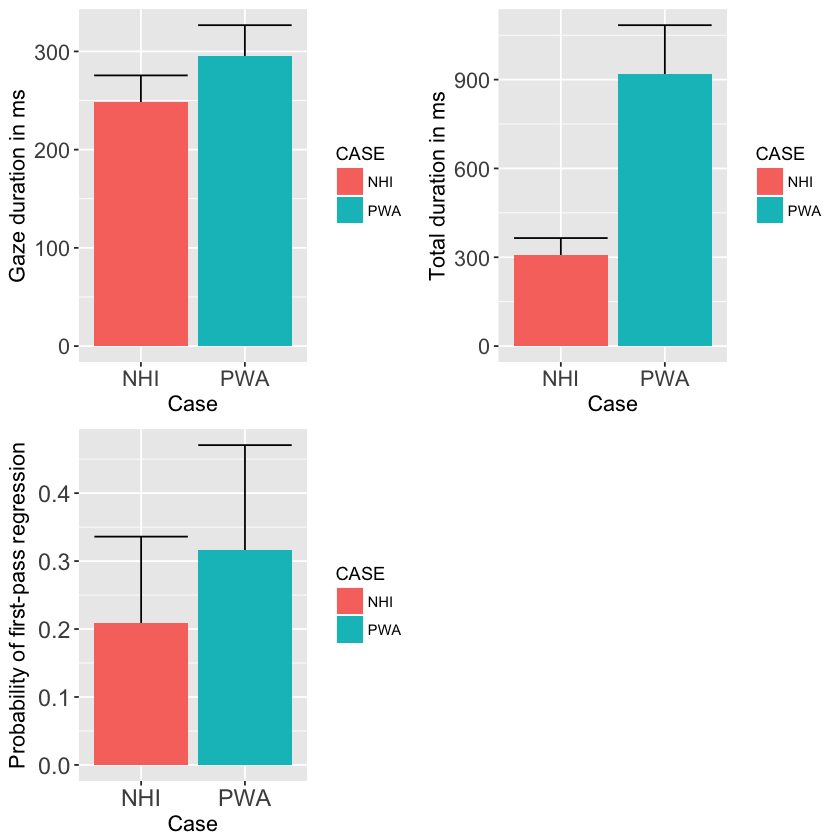

In [71]:
grid.arrange(plot_gaze, plot_total, plot_regress_prob, ncol=2, respect=TRUE)

### Summary: The participant with aphasia shows an increase in reading times and in first-pass regressions. 

## Plotting
### Eye movements as a function of trial type
### Gaze duration

In [72]:

line_gaze <-
ggplot(data, aes(x=PREDICTABILITY, y=GAZE_DURATION, group=interaction(CASE, FREQUENCY), colour=CASE, linetype=FREQUENCY)) +
  stat_summary(fun.data=mean_cl_normal, geom="errorbar", position=position_dodge(width=0.10), width=0.5)+
  stat_summary(fun.y=mean, geom="line", position=position_dodge(width=0.10)) +
  stat_summary(fun.y=mean, geom="point",position=position_dodge(width=0.10), aes(shape=CASE), size=5) +
  scale_shape_manual(values = c(16, 18)) +
  scale_x_discrete(limits=c("predictable", "unpredictable")) + 
  theme (axis.text.x=element_text(colour="#000000", size=13)) + 
  theme (axis.text.y=element_text(colour="#000000", size=13)) +
  theme(axis.title.y=element_text(colour="#000000", size=13)) +
  theme (axis.title.x = element_blank()) +
  scale_y_continuous(name="Gaze duration in ms") +
  theme(legend.title = element_text(size=13)) +
  theme(legend.text = element_text(size = 13)) +
  theme(legend.position="right")
#line_gaze

### Gaze durations 

### Total fixation duration

In [73]:

line_total <-
ggplot(data, aes(x=PREDICTABILITY, y=TOTAL_DURATION, group=interaction(CASE, FREQUENCY), colour=CASE, linetype=FREQUENCY)) +
  stat_summary(fun.data=mean_cl_normal, geom="errorbar", position=position_dodge(width=0.10), width=0.5)+
  stat_summary(fun.y=mean, geom="line", position=position_dodge(width=0.10)) +
  stat_summary(fun.y=mean, geom="point",position=position_dodge(width=0.10), aes(shape=CASE), size=5) +
  scale_shape_manual(values = c(16, 18)) +
  scale_x_discrete(limits=c("predictable", "unpredictable")) + 
  theme (axis.text.x=element_text(colour="#000000", size=13)) + 
  theme (axis.text.y=element_text(colour="#000000", size=13)) +
  theme(axis.title.y=element_text(colour="#000000", size=13)) +
  theme (axis.title.x = element_blank()) +
  scale_y_continuous(name="Total duration in ms") +
  theme(legend.title = element_text(size=13)) +
  theme(legend.text = element_text(size = 13)) +
  theme(legend.position="right")
#line_total

### First-pass regression

In [74]:

line_regression <-
ggplot(data, aes(x=PREDICTABILITY, y=FIRST_PASS_REGRESSION, group=interaction(CASE, FREQUENCY), colour=CASE, linetype=FREQUENCY)) +
  stat_summary(fun.data=mean_cl_normal, geom="errorbar", position=position_dodge(width=0.10), width=0.5)+
  stat_summary(fun.y=mean, geom="line", position=position_dodge(width=0.10)) +
  stat_summary(fun.y=mean, geom="point",position=position_dodge(width=0.10), aes(shape=CASE), size=5) +
  scale_shape_manual(values = c(16, 18)) +
  scale_x_discrete(limits=c("predictable", "unpredictable")) + 
  theme (axis.text.x=element_text(colour="#000000", size=13)) + 
  theme (axis.text.y=element_text(colour="#000000", size=13)) +
  theme(axis.title.y=element_text(colour="#000000", size=13)) +
  theme (axis.title.x = element_blank()) +
  scale_y_continuous(name="Probability of a first-pass regression") +
  theme(legend.title = element_text(size=13)) +
  theme(legend.text = element_text(size = 13)) +
  theme(legend.position="right")
#line_regression

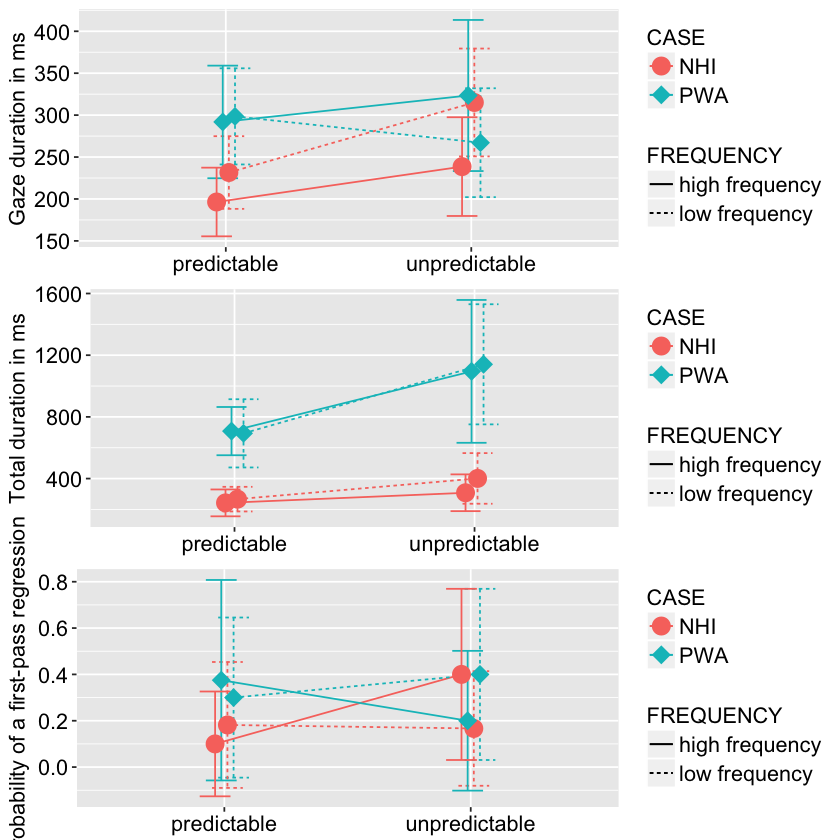

In [75]:
grid.arrange(line_gaze, line_total, line_regression, nrow=3)

### Summary: 
Eye movements by both participants are influenced by word frequency and contextual predictability, but not in a consistent manner. The neurologically healthy participant demonstrates a word frequency effect and a predictability effect for gaze duration, for total fixation duration these effects seem smaller. For regressions there seems to be an interaction between word frequency and predictability in that only high frequency words are affected by the context. The participant with aphasia showed an influence of predictability in the predicted direction for high frequency words, but in the unpredicted direction for low frequency words. For total fixation durations, words that were unpredictable in context attracted longer viewing times, but frequency had no effect. Results from first-pass regressions reveal that for low frequency words, the participant was more likely to fixate out of unpredictable words than predictable words. In contrast, for high frequency words, the individual with aphasia showed more regressions out of predictable words.